# _a_TLC

In [1]:
from atlc import *

Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 2000.0 nm
Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 2000.0 nm
===
J_sc: 28.443 mA/cm^2
J0_rad: 5.92e-20 mA/cm^2
V_oc: 1.231 V
V_max, J_max: 1.133 V, 27.804 mA/cm^2
FF: 89.962%
Efficiency: 31.501%


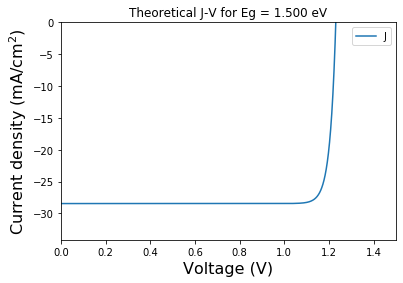

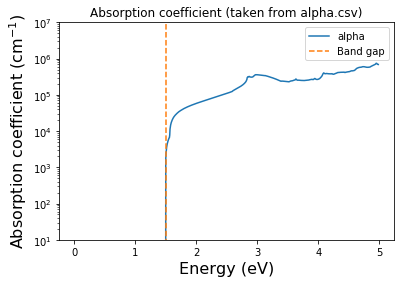

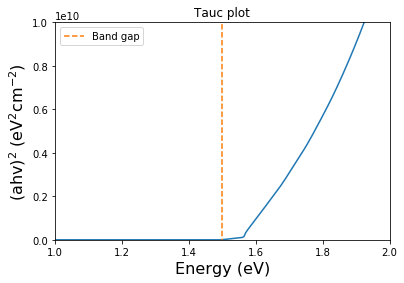

In [7]:
atlc_CZTS = tlc(1.5, T=300, thickness=2000)
print(atlc_CZTS)
# atlc_CZTS.calculate_SRH()
# Radiative limits
# reading "alpha.csv"
atlc_CZTS.calculate_rad()

print(atlc_CZTS)
atlc_CZTS.plot_jv()
atlc_CZTS.plot_alpha()
atlc_CZTS.plot_tauc()

# eff_rad = []
# for thickness in range(1, 5*1000, 100):
#     atlc_CZTS = tlc(1.5, T=300, thickness=thickness)
#     atlc_CZTS.calculate_rad()
#     eff_rad.append(atlc_CZTS.efficiency*100)
    

Trap limited conversion efficiency (TLC)
T: 300.0 K
E_gap: 1.5 eV
Thickness: 4901.0 nm
===
J_sc: 28.972 mA/cm^2
J0_rad: 6.03e-20 mA/cm^2
V_oc: 0.820 V
V_max, J_max: 0.733 V, 27.979 mA/cm^2
FF: 86.304%
Efficiency: 20.508%


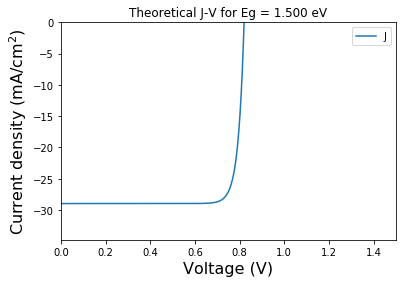

In [3]:
# atlc_CZTS.calculate_SRH()
# atlc_CZTS.calculate_rad()
# Radiative limits + nonradiative recombination
# reading "alpha.csv", "input-fermi.dat", "POSCAR", "totdos.dat", "trap.dat"
atlc_CZTS.calculate()

print(atlc_CZTS)
atlc_CZTS.plot_jv()

## Thickness vs efficiency

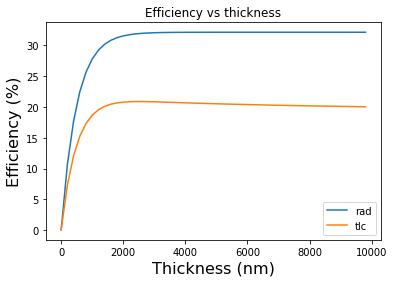

In [14]:
eff_rad = []
eff_srh = []
thickness_list = range(1, 10*1000, 200)

for thickness in thickness_list:
    atlc_CZTS = tlc(1.5, T=300, thickness=thickness)
    atlc_CZTS.calculate_rad()
    eff_rad.append(atlc_CZTS.efficiency*100)
    atlc_CZTS.calculate()    
    eff_srh.append(atlc_CZTS.efficiency*100)
    
    

plt.plot(thickness_list, eff_rad, label="rad")
plt.plot(thickness_list, eff_srh, label="tlc")
plt.xlabel("Thickness (nm)", fontsize=16)
plt.ylabel("Efficiency (%)", fontsize=16)
plt.title("Efficiency vs thickness")
plt.legend()

plt.show()

Maximum efficiency at  2601 nm


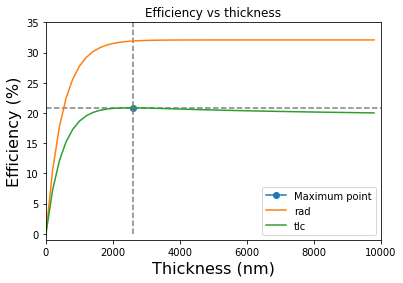

In [15]:
import numpy as np

indx = np.argmax(eff_srh)

plt.plot([thickness_list[indx]], [eff_srh[indx]],
         marker = 'o', label="Maximum point")
plt.plot([0, 1E10], [eff_srh[indx], eff_srh[indx]], c='gray', ls='--')
plt.plot([thickness_list[indx],thickness_list[indx]], [0, 100], c='gray', ls='--')

print("Maximum efficiency at ", thickness_list[indx], "nm")
plt.plot(thickness_list, eff_rad, label="rad")
plt.plot(thickness_list, eff_srh, label="tlc")
plt.xlabel("Thickness (nm)", fontsize=16)
plt.ylabel("Efficiency (%)", fontsize=16)
plt.title("Efficiency vs thickness")
plt.ylim((-1, 35))
plt.xlim((0, 1000*10))
plt.legend()

plt.show()

In [ ]:
_ab initi